## The Sparks Foundation 

# Data Science and Business Analytics- GRIP MARCH 2022

## Author- Aathira Suresh

# TASK 2- Unsupervised Learning

In this task, it is required to do the following

1. Perform data preprocessing in the Iris Dataset

2. Identify the optimum number of clusters

3. Build a partion-based clustering algorithm K-Means

**Importing necessary dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

**DATASET :** https://bit.ly/3kXTdox

**Reading the Dataset**

In [2]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

**Data Pre-processing**

In [5]:
df.drop('Id', axis=1, inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Missing value Identification**

In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Inference :** There are no missing values in the dataset

**Outliers Identification**

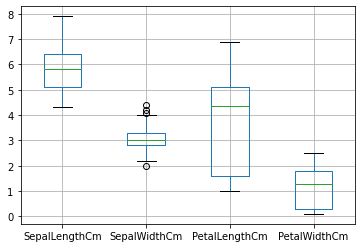

In [7]:
df.boxplot();

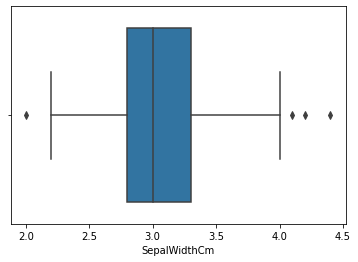

In [8]:
sns.boxplot(x='SepalWidthCm', data=df);

**Removing Outliers**

In [9]:
df = df[(df['SepalWidthCm'] > 2.2) & (df['SepalWidthCm']< 4)]

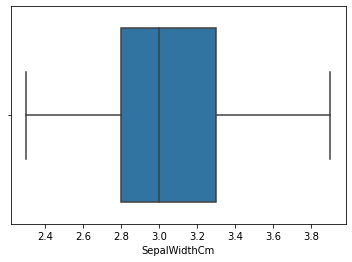

In [10]:
sns.boxplot(x='SepalWidthCm', data=df);

**Scaling the data**

In [11]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
X_norm = StandardScaler()
num_norm = X_norm.fit_transform(X)
X = pd.DataFrame(num_norm, columns = X.columns)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.893900,1.217097,-1.371469,-1.343605
1,-1.131381,-0.128914,-1.371469,-1.343605
2,-1.368863,0.409491,-1.428347,-1.343605
3,-1.487603,0.140288,-1.314592,-1.343605
4,-1.012641,1.486299,-1.371469,-1.343605


**Identifying the optimal value of K using Elbow plot**

In [13]:
wcss  = []
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

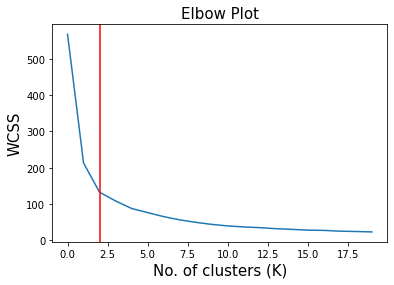

In [14]:
plt.plot(wcss)
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.axvline(x = 2, color = 'red')
plt.show()

**Inference:** From the elbow plot, we can see that the Optimal number of clusters are 2

**Identifying the optimal value of K using Silhouette Score**

In [15]:
n_clusters = [2, 3, 4, 5, 6]
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(X)
    score = silhouette_score(X, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.5810370675406509)
For 3 clusters the silhouette score is 0.4655538881595734)
For 4 clusters the silhouette score is 0.4160809581210995)
For 5 clusters the silhouette score is 0.36071197037749025)
For 6 clusters the silhouette score is 0.35706670939314306)


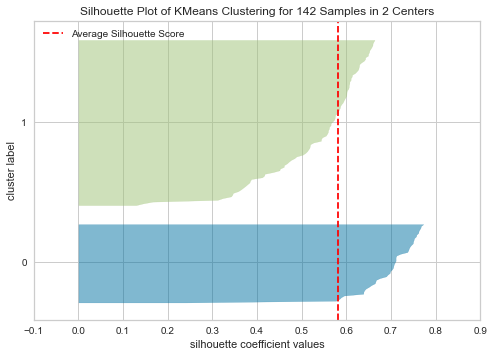

In [16]:
from yellowbrick.cluster import silhouette_visualizer
silhouette_visualizer(KMeans(2), X, colors='yellowbrick');

**Inference:** From the Silhoette score, we can see that the Optimal number of clusters are 2 as the maximum value of Silhouette score is for 2 Clusters

**Building Clusters using K-Means**

In [17]:
new_clusters = KMeans(n_clusters = 2, random_state = 10)
new_clusters.fit(X)
df['Cluster'] = new_clusters.labels_
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [18]:
df.Cluster.value_counts()

1    96
0    46
Name: Cluster, dtype: int64

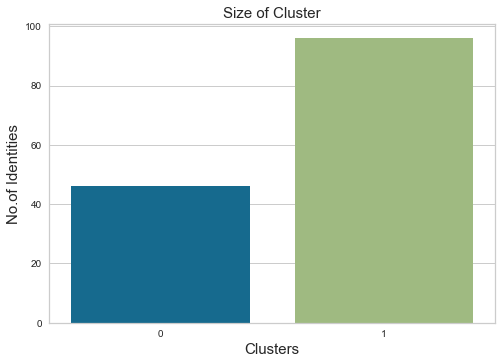

In [19]:
sns.countplot(data= df, x = 'Cluster')
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('No.of Identities', fontsize = 15)
plt.show()

**Analyzing the Clusters using lmplot**

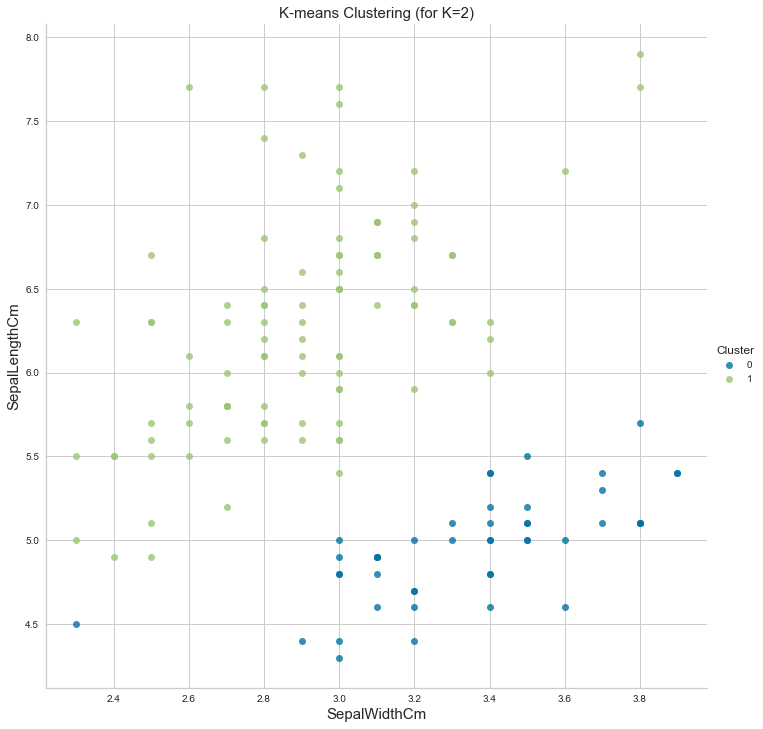

In [20]:
sns.lmplot(x = 'SepalWidthCm', y = 'SepalLengthCm', data = df, hue = 'Cluster', fit_reg = False, size = 10)
plt.title('K-means Clustering (for K=2)', fontsize = 15)
plt.xlabel('SepalWidthCm', fontsize = 15)
plt.ylabel('SepalLengthCm', fontsize = 15)
plt.show()

**Describing Cluster 0**

In [21]:
len(df[df['Cluster'] == 0])

46

In [22]:
df[df.Cluster==0].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
count,46.000000,46.000000,46.000000,46.000000,46.0
mean,4.958696,3.352174,1.469565,0.245652,0.0
std,0.319427,0.317448,0.176219,0.106888,0.0
min,4.300000,2.300000,1.000000,0.100000,0.0
25%,4.800000,3.100000,1.400000,0.200000,0.0
50%,5.000000,3.400000,1.500000,0.200000,0.0
75%,5.100000,3.500000,1.600000,0.300000,0.0
max,5.700000,3.900000,1.900000,0.600000,0.0


In [23]:
df[df.Cluster==0].describe(include = object)

,Species
count,46
unique,1
top,Iris-setosa
freq,46


**Inference:** The above summary shows that the average SepalLengthCm in this cluster is 4.95 cm. In average, their PetalLengthCm is found to me nearly 1.47 cm. This cluster has one unique species, which  is Iris-setosa.

**Describing Cluster 1**

In [24]:
len(df[df['Cluster'] == 1])

96

In [25]:
df[df.Cluster==1].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
count,96.00000,96.000000,96.000000,96.000000,96.0
mean,6.28125,2.902083,4.933333,1.693750,1.0
std,0.66274,0.303655,0.823557,0.421229,0.0
min,4.90000,2.300000,3.000000,1.000000,1.0
25%,5.80000,2.700000,4.400000,1.300000,1.0
50%,6.30000,2.900000,4.900000,1.650000,1.0
75%,6.70000,3.100000,5.600000,2.000000,1.0
max,7.90000,3.800000,6.900000,2.500000,1.0


In [26]:
df[df.Cluster==1].describe(include = object)

,Species
count,96
unique,2
top,Iris-virginica
freq,49


**Inference:** The above summary shows that the average SepalLengthCm in this cluster is 6.28 cm. In average, their PetalLengthCm is found to me nearly 5 cm. This cluster has one unique species, which  is Iris-virginica.